In [ ]:
import itertools
import pandas as pd
import seaborn as sns
from copy import deepcopy
import numpy as np
import random

In [ ]:
df = pd.read_csv("/content/unigram_freq.csv")
df.head()

In [ ]:
allwords = []
with open("/content/words_alpha.txt") as f:
    allwords = f.readlines()

fiveLetterWords = list(map(lambda x : x[:-1], filter(lambda x : len(x) == 6, allwords)))
fourLetterWords = list(map(lambda x : x[:-1], filter(lambda x : len(x) == 5, allwords)))

In [ ]:
# Eliminating plurals

print(len(fiveLetterWords))

for word in fiveLetterWords:
    if word[-1] == 's':
        if word[:-1] in fourLetterWords:
            fiveLetterWords.remove(word)

print(len(fiveLetterWords))

15918
13546


In [ ]:
temp = []
cnt = 0

for word in fiveLetterWords:
    cnt += 1
    if word in df['word'].to_numpy():
        temp.append((word, int(df[df['word'] == word]['count'])))
        print(cnt)

In [ ]:
newDict = sorted(temp, key = lambda x : x[1], reverse=True)[:5000]
newDict

In [ ]:
fiveLetterWords = []

for word in newDict:
    fiveLetterWords.append(word[0])

fiveLetterWords

# Letter Distribution (multiple times in word counted)

In [ ]:
letterCount = dict()

for _ in range(97, 123):
    letterCount[chr(_)] = 0

for word in fiveLetterWords:
    letterCount[word[0]] += 1
    letterCount[word[1]] += 1
    letterCount[word[2]] += 1
    letterCount[word[3]] += 1
    letterCount[word[4]] += 1

temp = {'letter' : [], 'count' : []}

for item in letterCount.items():
    temp['letter'].append(item[0])
    temp['count'].append(item[1])

letterCount = deepcopy(temp)
letterCount

In [ ]:
df = pd.DataFrame.from_dict(data=letterCount)
df

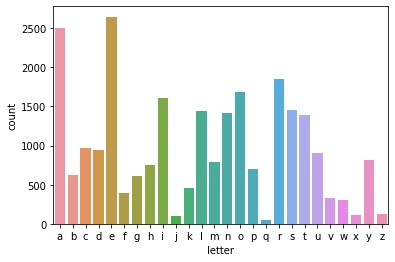

In [ ]:
sns.barplot(x = df['letter'], y = df['count'])

# Letter Distribution (multiple occurences in word not counted)

In [ ]:
letterCount = dict()

for _ in range(97, 123):
    letterCount[chr(_)] = 0

for word in fiveLetterWords:
    for letter in np.unique(np.array(list(word))):
        letterCount[letter] += 1

temp = {'letter' : [], 'count' : []}

for item in letterCount.items():
    temp['letter'].append(item[0])
    temp['count'].append(item[1])

letterCount = deepcopy(temp)
letterCount

In [ ]:
df = pd.DataFrame.from_dict(data=letterCount)
df

In [ ]:
sns.barplot(x = df['letter'], y = df['count'])

# Monte Carlo Simulations to choose best first word

In [ ]:
results = dict()
for word in fiveLetterWords:
    results[word] = 0

In [ ]:
for _ in range(100000):
    target = random.choice(fiveLetterWords)

    for word in fiveLetterWords:
        score = 0

        if word == target:
            continue

        for i in range(5):
            if target[i] == word[i]:
                score += 2
            elif target[i] in word:
                score += 1
            else:
                score -= 1
        
        results[word] += score
    
    if (_  + 1) % 100 == 0:
        resitems = results.items()
        print(f"{_ + 1} : ", sorted(resitems, key = lambda x : x[1], reverse = True)[:10])

In [ ]:
temp = {'word' : [], 'score' : []}

resitems = results.items()
resitems = sorted(resitems, key = lambda x : x[1], reverse = True)[:10]

for item in resitems:
    temp['word'].append(item[0])
    temp['score'].append(item[1])

scores = deepcopy(temp)
scores

In [ ]:
df = pd.DataFrame.from_dict(data=scores)

sns.barplot(x = df['word'], y = df['score'])

# v2.0

## Revised Dictionary Selection to include common words only

In [ ]:
df = pd.read_csv("/content/unigram_freq.csv")
df.head()

,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698


In [ ]:
allwords = []
with open("/content/words_alpha.txt") as f:
    allwords = f.readlines()

fiveLetterWords = list(map(lambda x : x[:-1], filter(lambda x : len(x) == 6, allwords)))
fourLetterWords = list(map(lambda x : x[:-1], filter(lambda x : len(x) == 5, allwords)))

In [ ]:
# Eliminating plurals

print(len(fiveLetterWords))

for word in fiveLetterWords:
    if word[-1] == 's':
        if word[:-1] in fourLetterWords:
            fiveLetterWords.remove(word)

print(len(fiveLetterWords))

15918
13546


In [ ]:
temp = []
cnt = 0

for word in fiveLetterWords:
    cnt += 1
    if word in df['word'].to_numpy():
        temp.append((word, int(df[df['word'] == word]['count'])))
        print(cnt)

In [ ]:
fiveLetterWords = sorted(temp, key = lambda x : x[1], reverse=True)[:5000]
fiveLetterWords

# Designing Simulations